In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

np.random.seed(500)

In [16]:
df = pd.read_csv('../data/processed/NOTE_EVENTS_WITH_DRUGS.csv', dtype=str)
# df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ROW_ID         50000 non-null  object
 1   SUBJECT_ID     50000 non-null  object
 2   HADM_ID        50000 non-null  object
 3   CHARTDATE      50000 non-null  object
 4   CHARTTIME      0 non-null      object
 5   STORETIME      0 non-null      object
 6   CATEGORY       50000 non-null  object
 7   DESCRIPTION    50000 non-null  object
 8   CGID           0 non-null      object
 9   ISERROR        0 non-null      object
 10  TEXT           50000 non-null  object
 11  CLEAN_TEXT     50000 non-null  object
 12  DRUGS_PRESENT  48589 non-null  object
dtypes: object(13)
memory usage: 5.0+ MB


In [4]:

free_text = df['CLEAN_TEXT']

### Drug Type

In [5]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(free_text)

In [6]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(free_text)

### Top 10 Prescribed Routes

In [7]:
sum_words = X_count.sum(axis=0)

words_freq = [[word, sum_words[0, idx]] for word, idx in count_vectorizer.vocabulary_.items()]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

# freqs[:, 0] = c_features
# freqs[:, 1] = X_count.sum(axis=0)


In [8]:
df = pd.DataFrame.from_records(words_freq, columns=['word', 'corpus_count'])

In [12]:
temp_df = df.head(10)

In [13]:
temp_df.head()

,word,corpus_count
0,tablet,521939
1,patient,501926
2,mg,500115
3,po,432901
4,blood,390432


### Top 10 Word & Count

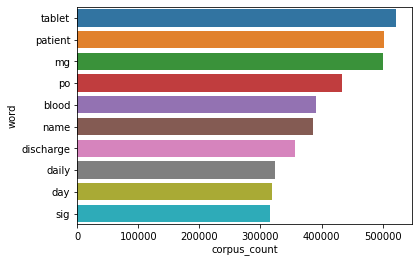

In [15]:
# sns.countplot(route_count)
sns.barplot(y='word', x = 'corpus_count', data=temp_df)
plt.show()

### Conclusion:

- The words with most count corpus are general words such as 'tablet', 'patient' etc
- These words would cause the model overfit due it's high weights.
- Current classification problem is not an ideal application for Count vectorizer